In [ ]:
# パラメータの設定
VOCAB_SIZE = len(set(word2id.values())) + 1
EMB_SIZE = 300
PADDING_IDX = len(set(word2id.values()))
OUTPUT_SIZE = 4
OUT_CHANNELS = 100
KERNEL_HEIGHTS = 3
STRIDE = 1
PADDING = 1
LEARNING_RATE = 5e-2
BATCH_SIZE = 64
NUM_EPOCHS = 10

# モデルの定義
model = CNN(VOCAB_SIZE, EMB_SIZE, PADDING_IDX, OUTPUT_SIZE, OUT_CHANNELS, KERNEL_HEIGHTS, STRIDE, PADDING, emb_weights=weights)

# 損失関数の定義
criterion = nn.CrossEntropyLoss()

# オプティマイザの定義
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE)

# デバイスの指定
device = torch.device('cuda')

# モデルの学習
log = train_model(dataset_train, dataset_valid, BATCH_SIZE, model, criterion, optimizer, NUM_EPOCHS, collate_fn=Padsequence(PADDING_IDX), device=device)


epoch: 1, loss_train: 1.0920, accuracy_train: 0.5712, loss_valid: 1.0977, accuracy_valid: 0.5660, 9.8187sec
epoch: 2, loss_train: 1.0168, accuracy_train: 0.6339, loss_valid: 1.0321, accuracy_valid: 0.6087, 9.2777sec
epoch: 3, loss_train: 0.9377, accuracy_train: 0.6638, loss_valid: 0.9688, accuracy_valid: 0.6409, 9.5360sec
epoch: 4, loss_train: 0.8753, accuracy_train: 0.6942, loss_valid: 0.9192, accuracy_valid: 0.6702, 8.8406sec
epoch: 5, loss_train: 0.8258, accuracy_train: 0.7102, loss_valid: 0.8882, accuracy_valid: 0.6859, 9.4585sec
epoch: 6, loss_train: 0.7917, accuracy_train: 0.7269, loss_valid: 0.8642, accuracy_valid: 0.6957, 9.5590sec
epoch: 7, loss_train: 0.7706, accuracy_train: 0.7336, loss_valid: 0.8534, accuracy_valid: 0.7009, 8.7670sec
epoch: 8, loss_train: 0.7579, accuracy_train: 0.7352, loss_valid: 0.8465, accuracy_valid: 0.7039, 9.3697sec
epoch: 9, loss_train: 0.7514, accuracy_train: 0.7387, loss_valid: 0.8395, accuracy_valid: 0.7046, 9.6330sec
epoch: 10, loss_train: 0.749

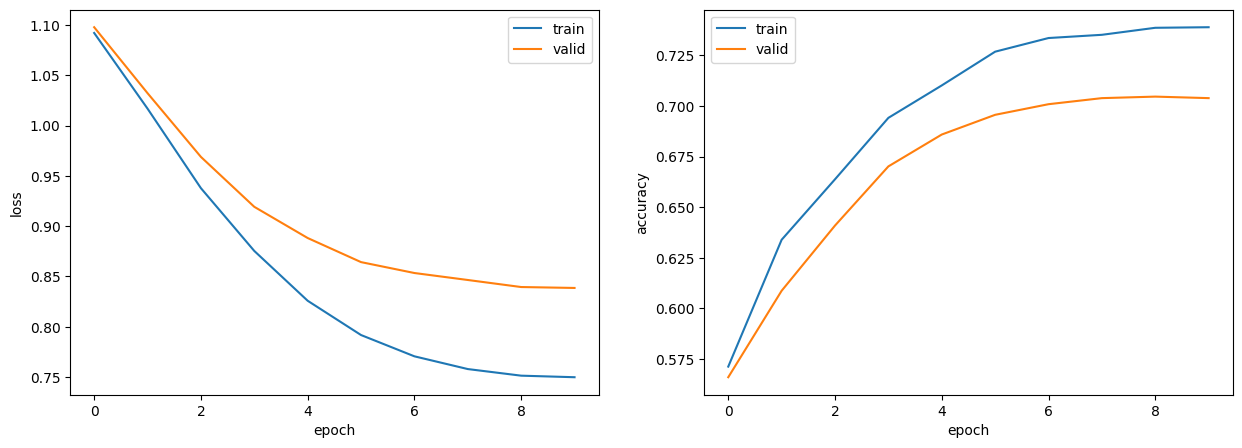

正解率（学習データ）：0.739
正解率（評価データ）：0.719


In [ ]:
# ログの可視化
visualize_logs(log)

# 正解率の算出
_, acc_train = calculate_loss_and_accuracy(model, dataset_train, device)
_, acc_test = calculate_loss_and_accuracy(model, dataset_test, device)
print(f'正解率（学習データ）：{acc_train:.3f}')
print(f'正解率（評価データ）：{acc_test:.3f}')